In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

test_data=pd.read_json("test.json")
train_data=pd.read_json("train.json")
test_data.reset_index(drop=True,inplace=True)
train_data.reset_index(drop=True,inplace=True)
print(test_data.shape)
print(train_data.shape)

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

(74659, 14)
(49352, 15)


In [2]:
train_data.groupby('display_address')['latitude'].count()

display_address
                                           135
\tEast 10th Street and East 11th Street      1
\tWashington Street                          1
                                             2
  Allen street                               1
                                          ... 
williamsburg                                 2
williamsburg  NO FEE                         1
williamsburg - NO FEE                        8
williamsburg Northside  NO FEE               1
▇_▶SEE TODAY*330 East 117th St               1
Name: latitude, Length: 8826, dtype: int64

In [3]:
# created 不用精确，到月，分类变量

In [4]:
train_data['features'][0]    # 稀疏矩阵  one-hot

['Dining Room',
 'Pre-War',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'Dogs Allowed',
 'Cats Allowed']

In [5]:
train_data["description"][0]

'Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a  website_redacted '

In [6]:
train_data['features'][1]

['Doorman',
 'Elevator',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'No Fee']

In [7]:
train_data["description"][1]

'BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind yourself and your home in the center of it all. Steps from Grand Central Station, at the epicenter of Manhattan, The Centra combines convenience and luxury to create a perfectly balanced living experience. Offering newly renovated over sized apartment layouts.<br /><br />Full Time DoormanElevatorNewly Renovated HallwaysLaundry in BuildingOn-Site Parking Garage<br /><br />I operate with the utmost care and integrity. The client is my #1 priority. Contact me for a viewing of the great apartment, I\'m more than confident we\'ll find a place for you to call home.Call/Text Keon: Email: If you require a move within 30 days write "URGENT" in the subject email or text message to be taken with high priority.<br /><br />One Month Free - net effective rent listed<p><a  website_redacted '

In [8]:
train_data['features'][2]

['Doorman',
 'Elevator',
 'Laundry in Building',
 'Laundry in Unit',
 'Dishwasher',
 'Hardwood Floors']

## value_counts()

In [9]:
manager_id=train_data["manager_id"].value_counts()

In [10]:
manager_id

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
                                    ... 
5c14d97220e45bff8e10bb34672a87b9       1
c96c8313de9e4198da9898b9009a8f4c       1
a4d41aee7c9c114309e98a5986641388       1
15145db0ac7db7f3d304e17a5cb075d3       1
bf5b420a34a4d0db833b0207d50cf54d       1
Name: manager_id, Length: 3481, dtype: int64

In [11]:
train_data['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
c06817bd28d9e41752f9a6f9abc5cab7       1
36e86c8a9a1848a1c9448f34a782ad64       1
d695a961d518f3a5203cb6eff1ae936f       1
d2a654435228eed4331552ed73175871       1
424839c29d604fbbb10f3cdaf3342da8       1
Name: building_id, Length: 7585, dtype: int64

In [12]:
train_data.head(50)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
5,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,low
6,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street,low
7,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue,high
8,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street,low
9,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street,low


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 5.6+ MB


In [14]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


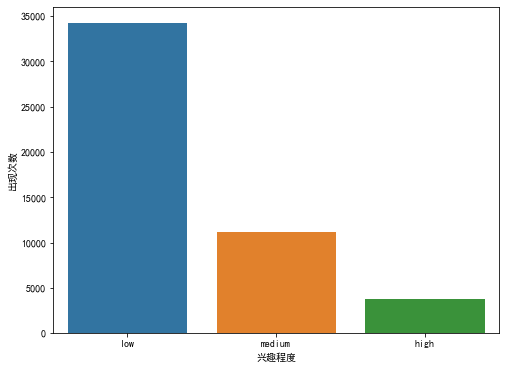

In [15]:
import seaborn as sns
import matplotlib.pyplot as  plt
from matplotlib.pylab import mpl
color = sns.color_palette()
mpl.rcParams['font.sans-serif'] = ['SimHei']
figure=plt.figure(figsize=(8,6))
interest=train_data['interest_level'].value_counts()
sns.barplot(interest.index,interest.values)
plt.ylabel("出现次数")
plt.xlabel("兴趣程度")
plt.show()

In [16]:
# 变量选择，特征工程ok之后，欠采样过采样
# 欠采样 无放回抽样
# 过采样 有放回抽样
# 只改training data
# 不讨论了，直接走

In [17]:
# 1.变量选择对于模型性能的影响
# 2.模型
# （两段是分开的）

In [18]:
X = train_data[['bathrooms','bedrooms','latitude','listing_id','longitude','price']].to_numpy()

In [19]:
# X = train_data[['bathrooms','bedrooms','latitude','longitude','price']].to_numpy()

In [20]:
# y = train_data[['interest_level']].to_numpy().ravel()

# 特征工程

## 1.时间变量转换

In [27]:
train_data['created'] = pd.to_datetime(train_data['created'])
train_data['month'] = train_data['created'].dt.month


In [28]:
train_data['month']

0        6
1        6
2        6
3        6
4        6
        ..
49347    4
49348    4
49349    4
49350    4
49351    4
Name: month, Length: 49352, dtype: int64

## 2.稀疏矩阵转换

In [34]:
train_data['features'][0]

['Dining Room',
 'Pre-War',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'Dogs Allowed',
 'Cats Allowed']

In [41]:
print(train_data['features'][0])

['Dining Room', 'Pre-War', 'Laundry in Building', 'Dishwasher', 'Hardwood Floors', 'Dogs Allowed', 'Cats Allowed']


In [43]:

for i in range(100):
    
    train_data['features'][i] += train_data['features'][i]
    print(train_data['features'])
    

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
                               ...                        
49347              [Elevator, Dishwasher, Hardwood Floors]
49348    [Common Outdoor Space, Cats Allowed, Dogs Allo...
49349    [Dining Room, Elevator, Pre-War, Laundry in Bu...
49350    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
49351    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
           

Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
                               ...                        
49347              [Elevator, Dishwasher, Hardwood Floors]
49348    [Common Outdoor Space, Cats Allowed, Dogs Allo...
49349    [Dining Room, Elevator, Pre-War, Laundry in Bu...
49350    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
49351    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevat

Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
                               ...                        
49347              [Elevator, Dishwasher, Hardwood Floors]
49348    [Common Outdoor Space, Cats Allowed, Dogs Allo...
49349    [Dining Room, Elevator, Pre-War, Laundry in Bu...
49350    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
49351    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevat

0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
                               ...                        
49347              [Elevator, Dishwasher, Hardwood Floors]
49348    [Common Outdoor Space, Cats Allowed, Dogs Allo...
49349    [Dining Room, Elevator, Pre-War, Laundry in Bu...
49350    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
49351    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
           

Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevator, Fitness Center, Laundry in...
                               ...                        
49347              [Elevator, Dishwasher, Hardwood Floors]
49348    [Common Outdoor Space, Cats Allowed, Dogs Allo...
49349    [Dining Room, Elevator, Pre-War, Laundry in Bu...
49350    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
49351    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object
0        [Dining Room, Pre-War, Laundry in Building, Di...
1        [Doorman, Elevator, Laundry in Building, Dishw...
2        [Doorman, Elevator, Laundry in Building, Laund...
3                                                       []
4        [Doorman, Elevat

In [ ]:
sum(iterable[, start])

In [ ]:
for i in train_data['features'][i]:
    train_data['features'] = train_data['features'][i].append()
    

## 把Y改为数值

In [21]:
interest_classification = train_data[['interest_level']]

In [22]:
# for the logistic rergession, it supports only ordinal output for the softmax case
# the softmax case has to do manually

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
interest_classification_encoded = ordinal_encoder.fit_transform(interest_classification)

In [23]:
y = interest_classification_encoded.ravel()
y

array([2., 1., 2., ..., 2., 2., 0.])

In [24]:
y.shape

(49352,)

In [25]:
X.shape

(49352, 6)

In [13]:
# train validation split

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)

In [14]:
# normalization process

X_train_norm = np.ones(X_train.shape)
X_validation_norm = np.ones(X_validation.shape)

num_features = X.shape[1]

for i in range(num_features):
    X_train_norm[:,i] = (X_train[:,i] - X[:,i].mean())/X[:,i].std()
    X_validation_norm[:,i] = (X_validation[:,i] - X[:,i].mean())/X[:,i].std()

In [15]:
y_validation

array([1., 1., 1., ..., 1., 1., 1.])

In [16]:
X_train_norm.shape[1]

6

In [17]:
ordinal_encoder.categories_

[array(['high', 'low', 'medium'], dtype=object)]

In [18]:
## 一共三类
# 0:high
# 1:low
# 2:medium

In [19]:
# 把分类的作为feature放入文件，名为interest_level_class
train_data['interest_level_class'] = y

### Correlation coefficient

In [20]:
# 显示线性关系
corrr = train_data.corr()
corrr['interest_level_class'].sort_values(ascending=False)

interest_level_class    1.000000
bedrooms                0.030213
latitude                0.001214
longitude              -0.002279
price                  -0.005527
listing_id             -0.009598
bathrooms              -0.013183
Name: interest_level_class, dtype: float64

In [21]:
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,interest_level_class
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,2.0
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,1.0
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,2.0
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,2.0
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,1.0


# 1. A more complicated NN Model

In [22]:
mirrored_strategy = tf.distribute.MirroredStrategy(
    cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [23]:
with mirrored_strategy.scope():
    model = keras.Sequential([
        keras.layers.Dense(50, activation='relu', input_shape=[X_train_norm.shape[1]]),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
      #  keras.layers.Dense(100, activation='relu'),
    #    keras.layers.Dense(100, activation='relu'),
     #   keras.layers.Dense(100, activation='relu'),
       # keras.layers.Dense(100, activation='relu'),
        #keras.layers.Dense(100, activation='relu'),
        #keras.layers.Dense(100, activation='relu'),
        #keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(6, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
        
    #model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [24]:
history = model.fit(X_train_norm, y_train,
                    validation_data = (X_validation_norm, y_validation), epochs=100, batch_size = 200)

Train on 34546 samples, validate on 14806 samples
Epoch 1/100
34546/34546 [==============================] - 3s 83us/sample - loss: 1.0867 - acc: 0.6795 - val_loss: 0.7950 - val_acc: 0.6940
Epoch 2/100
34546/34546 [==============================] - 0s 14us/sample - loss: 0.7735 - acc: 0.6950 - val_loss: 0.7600 - val_acc: 0.6940
Epoch 3/100
34546/34546 [==============================] - 0s 13us/sample - loss: 0.7540 - acc: 0.6950 - val_loss: 0.7428 - val_acc: 0.6940
Epoch 4/100
34546/34546 [==============================] - 0s 14us/sample - loss: 0.7371 - acc: 0.6950 - val_loss: 0.7257 - val_acc: 0.6940
Epoch 5/100
34546/34546 [==============================] - 0s 14us/sample - loss: 0.7247 - acc: 0.6950 - val_loss: 0.7167 - val_acc: 0.6940
Epoch 6/100
34546/34546 [==============================] - 1s 15us/sample - loss: 0.7177 - acc: 0.6950 - val_loss: 0.7159 - val_acc: 0.6940
Epoch 7/100
34546/34546 [==============================] - 1s 16us/sample - loss: 0.7137 - acc: 0.6949 - val_l

Epoch 59/100
34546/34546 [==============================] - 1s 18us/sample - loss: 0.6791 - acc: 0.7065 - val_loss: 0.7222 - val_acc: 0.7011
Epoch 60/100
34546/34546 [==============================] - 1s 16us/sample - loss: 0.6782 - acc: 0.7071 - val_loss: 0.7181 - val_acc: 0.7030
Epoch 61/100
34546/34546 [==============================] - 1s 15us/sample - loss: 0.6781 - acc: 0.7078 - val_loss: 0.7210 - val_acc: 0.7027
Epoch 62/100
34546/34546 [==============================] - 0s 14us/sample - loss: 0.6789 - acc: 0.7072 - val_loss: 0.7240 - val_acc: 0.7028
Epoch 63/100
34546/34546 [==============================] - 1s 19us/sample - loss: 0.6800 - acc: 0.7069 - val_loss: 0.7195 - val_acc: 0.7020
Epoch 64/100
34546/34546 [==============================] - 1s 32us/sample - loss: 0.6784 - acc: 0.7073 - val_loss: 0.7227 - val_acc: 0.7025
Epoch 65/100
34546/34546 [==============================] - 1s 30us/sample - loss: 0.6775 - acc: 0.7075 - val_loss: 0.7216 - val_acc: 0.7003
Epoch 66/100


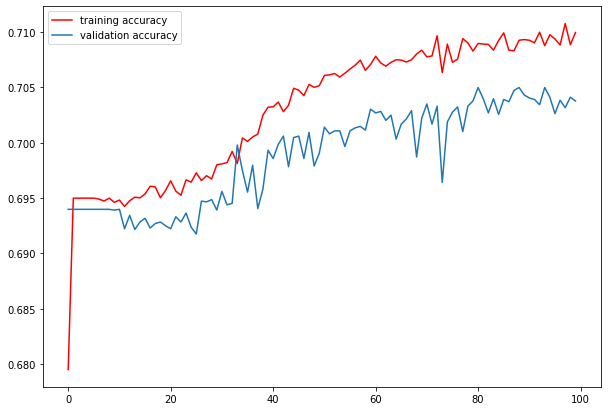

In [25]:
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'], 'r', label = 'training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend(loc = 'best')
plt.show()
# 各个类的准确率

# 2. Basic NN Model

In [44]:
with mirrored_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[X_train_norm.shape[1]]),
        keras.layers.Dense(3)
    ])
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [46]:
history2 = model.fit(X_train_norm, y_train,
                    validation_data=(X_validation_norm, y_validation), epochs=35, batch_size = 1000)

Train on 34546 samples, validate on 14806 samples
Epoch 1/35
34546/34546 [==============================] - 0s 14us/sample - loss: 2.2405 - acc: 0.4798 - val_loss: 2.1888 - val_acc: 0.4787
Epoch 2/35
34546/34546 [==============================] - 0s 2us/sample - loss: 2.2075 - acc: 0.4720 - val_loss: 2.1643 - val_acc: 0.4766
Epoch 3/35
34546/34546 [==============================] - 0s 2us/sample - loss: 2.1798 - acc: 0.4708 - val_loss: 2.1286 - val_acc: 0.4720
Epoch 4/35
34546/34546 [==============================] - 0s 2us/sample - loss: 2.1424 - acc: 0.4666 - val_loss: 2.0899 - val_acc: 0.4708
Epoch 5/35
34546/34546 [==============================] - 0s 2us/sample - loss: 2.1130 - acc: 0.4657 - val_loss: 2.0567 - val_acc: 0.4701
Epoch 6/35
34546/34546 [==============================] - 0s 2us/sample - loss: 2.0498 - acc: 0.4636 - val_loss: 2.0158 - val_acc: 0.4697
Epoch 7/35
34546/34546 [==============================] - 0s 2us/sample - loss: 2.0106 - acc: 0.4639 - val_loss: 1.9816 -

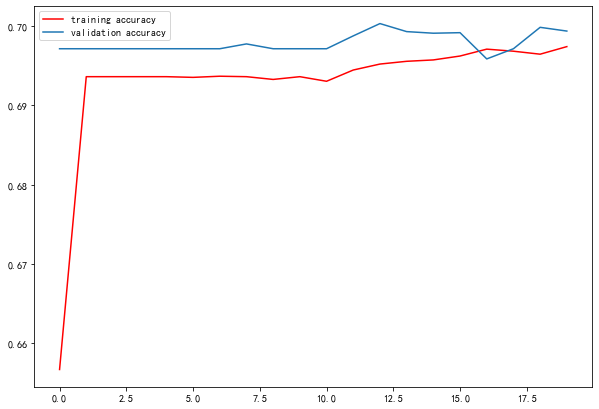

In [47]:
plt.figure(figsize=(10,7))
plt.plot(history.history['acc'], 'r', label = 'training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend(loc = 'best')
plt.show()